# APSG tutorial - pandas

In [1]:
from apsg import *

To activate APSG interface for pandas you need to import it.

In [2]:
import pandas as pd
from apsg.pandas import *

We can use pandas to read and manage data. See pandas documentation for more information.

In [3]:
df = pd.read_csv('structures.csv')
df.head()

,site,structure,azi,inc
0,PB3,L3,113,47
1,PB3,L3,118,42
2,PB3,S1,42,79
3,PB3,S1,42,73
4,PB4,S0,195,10


We can split out dataset by type of the structure...

In [4]:
g = df.groupby('structure')

and select only one type...

In [5]:
l = g.get_group('L3')
l.head()

,site,structure,azi,inc
0,PB3,L3,113,47
1,PB3,L3,118,42
5,PB8,L3,167,17
6,PB9,L3,137,9
7,PB9,L3,147,14


Before we can use APSG interface, we need to create column with APSG features. For that we can use `apsg` accessor and it's methods `cretae_vecs`, `create_fols` or `create_lins`. Each of this method accepts keyword argument `name` to provide name of the new column.

In [6]:
l = l.apsg.create_lins(name='L3')
l.head()

,site,structure,azi,inc,L3
0,PB3,L3,113,47,L:113/47
1,PB3,L3,118,42,L:118/42
5,PB8,L3,167,17,L:167/17
6,PB9,L3,137,9,L:137/9
7,PB9,L3,147,14,L:147/14


Once we create column with APSG features, we can use accessors `vec`, `fol` or `lin` providing methods for individual feature types, e.g. to calculate resultant vector

In [7]:
l.lin.R()

L:122/8

or to calculate orientation tensor...

In [8]:
l.lin.ortensor()

OrientationTensor3
[[ 0.29  -0.344 -0.067]
 [-0.344  0.644  0.088]
 [-0.067  0.088  0.065]]
(S1:0.932, S2:0.29, S3:0.216)

or to plot data on stereonet...

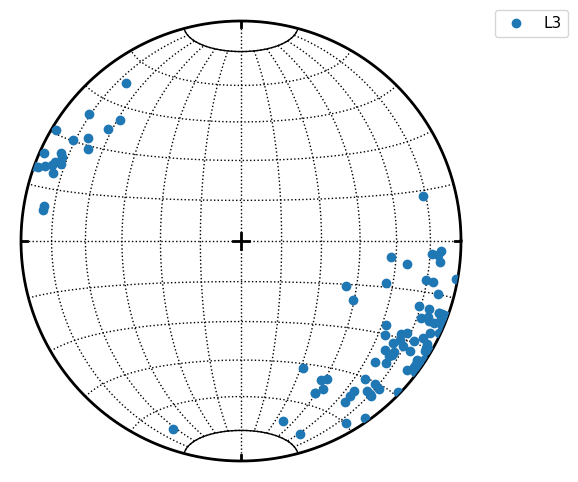

In [9]:
l.lin.line(label=True)

You can also extract APSG column as featureset using accessor property `getset`

In [10]:
l.lin.getset

L(97) L3

To construct stereonets with more data, you can pass stereonet object using keyword argument `snet`

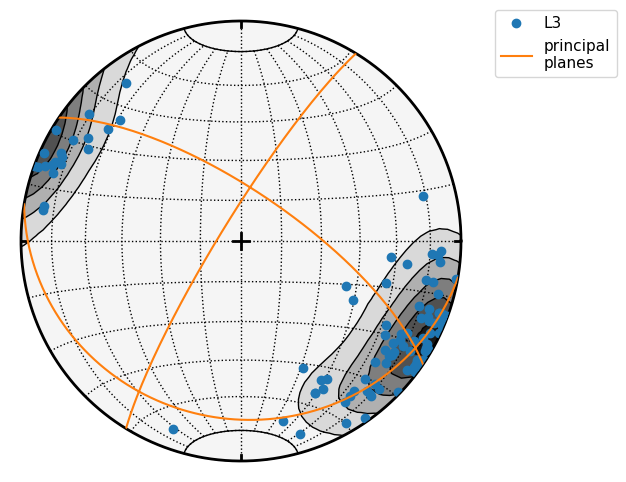

In [11]:
s = StereoNet()
l.lin.contour(snet=s)
l.lin.line(snet=s, label=True)
pp = l.lin.ortensor().eigenfols
s.great_circle(*pp, label='principal\nplanes')
s.show()

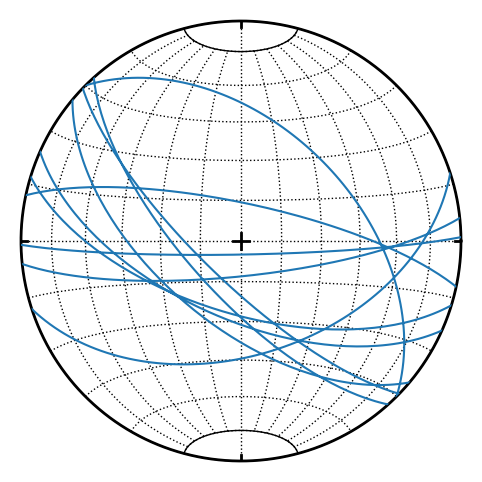

In [12]:
f = g.get_group('S2').apsg.create_fols(name='S2')
f.fol.great_circle()

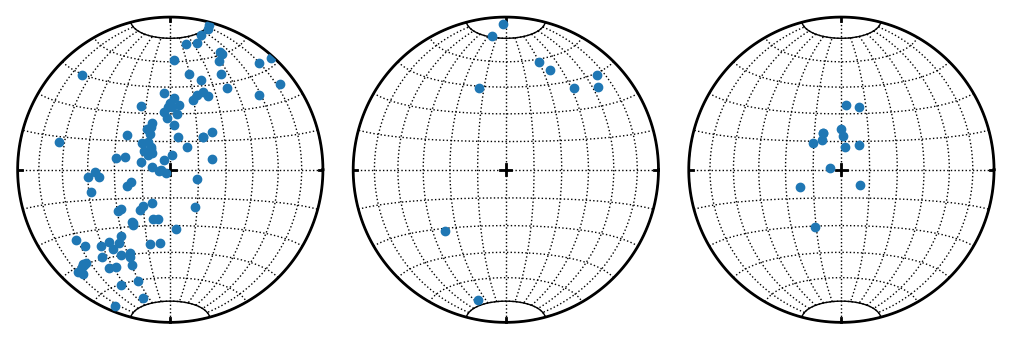

In [13]:
import matplotlib.pyplot as plt

fig = plt.figure(constrained_layout=True, figsize=(10, 4))
subfigs = fig.subfigures(1, 3)

# panel 1
s1 = StereoNet()
g.get_group('S1').apsg.create_fols().fol.pole(snet=s1)
# panel 2
s2 = StereoNet()
g.get_group('S2').apsg.create_fols().fol.pole(snet=s2)
# panel 3
s3 = StereoNet()
g.get_group('S3').apsg.create_fols().fol.pole(snet=s3)
# render2fig
s1.render2fig(subfigs[0])
s2.render2fig(subfigs[1])
s3.render2fig(subfigs[2])
plt.show()